In [132]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [133]:
data= pd.read_csv("trafficData158324.csv")

In [134]:
data

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324
...,...,...,...,...,...,...,...,...,...
32070,OK,56,66,668,56,2014-06-09T05:10:00,1,14352154,158324
32071,OK,53,69,668,53,2014-06-09T05:15:00,1,14352603,158324
32072,OK,53,69,668,53,2014-06-09T05:20:00,1,14353052,158324
32073,OK,53,69,668,53,2014-06-09T05:25:00,0,14353465,158324


In [135]:
data.value_counts

<bound method DataFrame.value_counts of       status  avgMeasuredTime  avgSpeed  extID  medianMeasuredTime  \
0         OK               66        56    668                  66   
1         OK               69        53    668                  69   
2         OK               69        53    668                  69   
3         OK               70        52    668                  70   
4         OK               64        57    668                  64   
...      ...              ...       ...    ...                 ...   
32070     OK               56        66    668                  56   
32071     OK               53        69    668                  53   
32072     OK               53        69    668                  53   
32073     OK               53        69    668                  53   
32074     OK               55        67    668                  55   

                 TIMESTAMP  vehicleCount       _id  REPORT_ID  
0      2014-02-13T11:30:00             7    190000     

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32075 entries, 0 to 32074
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status              32075 non-null  object
 1   avgMeasuredTime     32075 non-null  int64 
 2   avgSpeed            32075 non-null  int64 
 3   extID               32075 non-null  int64 
 4   medianMeasuredTime  32075 non-null  int64 
 5   TIMESTAMP           32075 non-null  object
 6   vehicleCount        32075 non-null  int64 
 7   _id                 32075 non-null  int64 
 8   REPORT_ID           32075 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.2+ MB


In [137]:
data.describe()

,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,vehicleCount,_id,REPORT_ID
count,32075.000000,32075.000000,32075.0,32075.000000,32075.000000,3.207500e+04,32075.0
mean,62.842214,61.103757,668.0,62.842214,4.303944,7.290175e+06,158324.0
std,17.318649,11.443108,0.0,17.318649,5.162599,4.101691e+06,0.0
min,0.000000,0.000000,668.0,0.000000,0.000000,1.900000e+05,158324.0
25%,55.000000,55.000000,668.0,55.000000,0.000000,3.737176e+06,158324.0
50%,61.000000,60.000000,668.0,61.000000,2.000000,7.286405e+06,158324.0
75%,67.000000,67.000000,668.0,67.000000,7.000000,1.084606e+07,158324.0
max,275.000000,132.000000,668.0,275.000000,36.000000,1.435380e+07,158324.0


In [138]:
data.status.value_counts()

OK    32075
Name: status, dtype: int64

In [139]:
data.avgMeasuredTime.describe()

count    32075.000000
mean        62.842214
std         17.318649
min          0.000000
25%         55.000000
50%         61.000000
75%         67.000000
max        275.000000
Name: avgMeasuredTime, dtype: float64

In [140]:
trafficdata= data[['TIMESTAMP','vehicleCount']]

In [141]:
trafficdata.describe()

,vehicleCount
count,32075.000000
mean,4.303944
std,5.162599
min,0.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,36.000000


In [142]:
trafficdata.TIMESTAMP=pd.to_datetime(trafficdata.TIMESTAMP)

C:\Users\pavan\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [143]:
hourly=trafficdata.resample("60Min",on='TIMESTAMP').sum()
daily=trafficdata.resample("D",on='TIMESTAMP').sum()

In [144]:
hourly

,vehicleCount
TIMESTAMP,
2014-02-13 11:00:00,36
2014-02-13 12:00:00,124
2014-02-13 13:00:00,92
2014-02-13 14:00:00,110
2014-02-13 15:00:00,91
...,...
2014-06-09 01:00:00,2
2014-06-09 02:00:00,0
2014-06-09 03:00:00,1


In [145]:
daily

,vehicleCount
TIMESTAMP,
2014-02-13,625
2014-02-14,1390
2014-02-15,501
2014-02-16,440
2014-02-17,1492
...,...
2014-06-05,574
2014-06-06,803
2014-06-07,393


<AxesSubplot:xlabel='TIMESTAMP'>

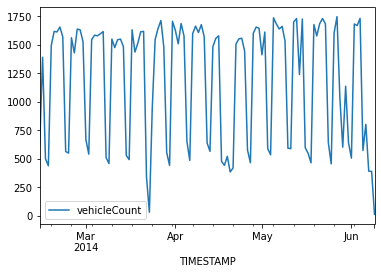

In [146]:
daily.plot(kind='line')

In [147]:
from statsmodels.tsa.stattools import adfuller

In [148]:
adfuller(daily)

(-0.7789012626624567,
 0.8252412405403091,
 13,
 103,
 {'1%': -3.4954932834550623,
  '5%': -2.8900369024285117,
  '10%': -2.5819706975209726},
 1508.3122250343624)

In [149]:
dailydiff=daily.diff()

In [150]:
dailydiff=dailydiff.dropna()

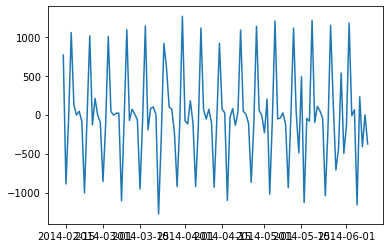

In [151]:
plt.plot(dailydiff)

In [152]:
adfuller(dailydiff)

(-5.197121179772543,
 8.911849241206046e-06,
 12,
 103,
 {'1%': -3.4954932834550623,
  '5%': -2.8900369024285117,
  '10%': -2.5819706975209726},
 1492.7268606865941)

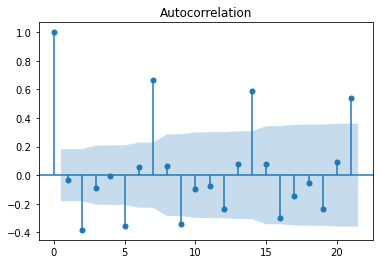

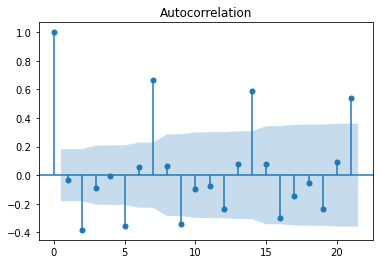

In [153]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dailydiff)

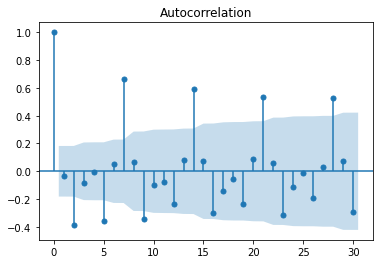

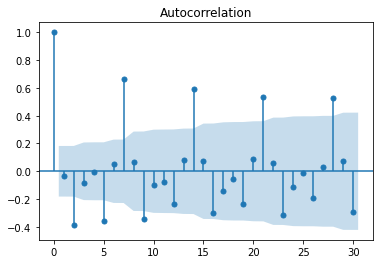

In [154]:
plot_acf(dailydiff,lags=30)

In [155]:
from pmdarima.arima import auto_arima

In [156]:
arimamodel=auto_arima(hourly)

In [157]:
arimamodel

ARIMA(order=(4, 0, 2), scoring_args={}, suppress_warnings=True)

In [158]:
trafficdata['index']=trafficdata.index

<ipython-input-158-ff0aee9a54d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficdata['index']=trafficdata.index


In [159]:
trafficdata

,TIMESTAMP,vehicleCount,index
0,2014-02-13 11:30:00,7,0
1,2014-02-13 11:35:00,5,1
2,2014-02-13 11:40:00,6,2
3,2014-02-13 11:45:00,3,3
4,2014-02-13 11:50:00,6,4
...,...,...,...
32070,2014-06-09 05:10:00,1,32070
32071,2014-06-09 05:15:00,1,32071
32072,2014-06-09 05:20:00,1,32072
32073,2014-06-09 05:25:00,0,32073


In [160]:
trafficdata['hour']=trafficdata.TIMESTAMP.dt.hour

<ipython-input-160-af12f230ae66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficdata['hour']=trafficdata.TIMESTAMP.dt.hour


In [161]:
trafficdata

,TIMESTAMP,vehicleCount,index,hour
0,2014-02-13 11:30:00,7,0,11
1,2014-02-13 11:35:00,5,1,11
2,2014-02-13 11:40:00,6,2,11
3,2014-02-13 11:45:00,3,3,11
4,2014-02-13 11:50:00,6,4,11
...,...,...,...,...
32070,2014-06-09 05:10:00,1,32070,5
32071,2014-06-09 05:15:00,1,32071,5
32072,2014-06-09 05:20:00,1,32072,5
32073,2014-06-09 05:25:00,0,32073,5


In [162]:
trafficdata['day']=trafficdata.TIMESTAMP.dt.day

<ipython-input-162-4208aa87eee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafficdata['day']=trafficdata.TIMESTAMP.dt.day


In [163]:
trafficdata

,TIMESTAMP,vehicleCount,index,hour,day
0,2014-02-13 11:30:00,7,0,11,13
1,2014-02-13 11:35:00,5,1,11,13
2,2014-02-13 11:40:00,6,2,11,13
3,2014-02-13 11:45:00,3,3,11,13
4,2014-02-13 11:50:00,6,4,11,13
...,...,...,...,...,...
32070,2014-06-09 05:10:00,1,32070,5,9
32071,2014-06-09 05:15:00,1,32071,5,9
32072,2014-06-09 05:20:00,1,32072,5,9
32073,2014-06-09 05:25:00,0,32073,5,9


In [164]:
hourly

,vehicleCount
TIMESTAMP,
2014-02-13 11:00:00,36
2014-02-13 12:00:00,124
2014-02-13 13:00:00,92
2014-02-13 14:00:00,110
2014-02-13 15:00:00,91
...,...
2014-06-09 01:00:00,2
2014-06-09 02:00:00,0
2014-06-09 03:00:00,1


In [165]:
hourly['timestamp']=hourly.index

In [166]:
hourly['index']=trafficdata.index[:2779]

In [167]:
hourly

,vehicleCount,timestamp,index
TIMESTAMP,,,
2014-02-13 11:00:00,36,2014-02-13 11:00:00,0
2014-02-13 12:00:00,124,2014-02-13 12:00:00,1
2014-02-13 13:00:00,92,2014-02-13 13:00:00,2
2014-02-13 14:00:00,110,2014-02-13 14:00:00,3
2014-02-13 15:00:00,91,2014-02-13 15:00:00,4
...,...,...,...
2014-06-09 01:00:00,2,2014-06-09 01:00:00,2774
2014-06-09 02:00:00,0,2014-06-09 02:00:00,2775
2014-06-09 03:00:00,1,2014-06-09 03:00:00,2776


In [168]:
hourly.set_index("index")

,vehicleCount,timestamp
index,,
0,36,2014-02-13 11:00:00
1,124,2014-02-13 12:00:00
2,92,2014-02-13 13:00:00
3,110,2014-02-13 14:00:00
4,91,2014-02-13 15:00:00
...,...,...
2774,2,2014-06-09 01:00:00
2775,0,2014-06-09 02:00:00
2776,1,2014-06-09 03:00:00


In [169]:
hourly.dtypes

vehicleCount             int64
timestamp       datetime64[ns]
index                    int64
dtype: object

In [170]:
hourly['date']=hourly.timestamp.dt.day

In [171]:
hourly

,vehicleCount,timestamp,index,date
TIMESTAMP,,,,
2014-02-13 11:00:00,36,2014-02-13 11:00:00,0,13
2014-02-13 12:00:00,124,2014-02-13 12:00:00,1,13
2014-02-13 13:00:00,92,2014-02-13 13:00:00,2,13
2014-02-13 14:00:00,110,2014-02-13 14:00:00,3,13
2014-02-13 15:00:00,91,2014-02-13 15:00:00,4,13
...,...,...,...,...
2014-06-09 01:00:00,2,2014-06-09 01:00:00,2774,9
2014-06-09 02:00:00,0,2014-06-09 02:00:00,2775,9
2014-06-09 03:00:00,1,2014-06-09 03:00:00,2776,9


In [172]:
hourly['month']=hourly.timestamp.dt.month

In [173]:
hourly['dayoftheweek']=hourly.timestamp.dt.dayofweek

In [174]:
hourly

,vehicleCount,timestamp,index,date,month,dayoftheweek
TIMESTAMP,,,,,,
2014-02-13 11:00:00,36,2014-02-13 11:00:00,0,13,2,3
2014-02-13 12:00:00,124,2014-02-13 12:00:00,1,13,2,3
2014-02-13 13:00:00,92,2014-02-13 13:00:00,2,13,2,3
2014-02-13 14:00:00,110,2014-02-13 14:00:00,3,13,2,3
2014-02-13 15:00:00,91,2014-02-13 15:00:00,4,13,2,3
...,...,...,...,...,...,...
2014-06-09 01:00:00,2,2014-06-09 01:00:00,2774,9,6,0
2014-06-09 02:00:00,0,2014-06-09 02:00:00,2775,9,6,0
2014-06-09 03:00:00,1,2014-06-09 03:00:00,2776,9,6,0


In [175]:
hourly['time']=hourly.timestamp.dt.hour

In [176]:
hourly

,vehicleCount,timestamp,index,date,month,dayoftheweek,time
TIMESTAMP,,,,,,,
2014-02-13 11:00:00,36,2014-02-13 11:00:00,0,13,2,3,11
2014-02-13 12:00:00,124,2014-02-13 12:00:00,1,13,2,3,12
2014-02-13 13:00:00,92,2014-02-13 13:00:00,2,13,2,3,13
2014-02-13 14:00:00,110,2014-02-13 14:00:00,3,13,2,3,14
2014-02-13 15:00:00,91,2014-02-13 15:00:00,4,13,2,3,15
...,...,...,...,...,...,...,...
2014-06-09 01:00:00,2,2014-06-09 01:00:00,2774,9,6,0,1
2014-06-09 02:00:00,0,2014-06-09 02:00:00,2775,9,6,0,2
2014-06-09 03:00:00,1,2014-06-09 03:00:00,2776,9,6,0,3


In [177]:
hourly.reset_index(inplace=True)

In [178]:
hourly

,TIMESTAMP,vehicleCount,timestamp,index,date,month,dayoftheweek,time
0,2014-02-13 11:00:00,36,2014-02-13 11:00:00,0,13,2,3,11
1,2014-02-13 12:00:00,124,2014-02-13 12:00:00,1,13,2,3,12
2,2014-02-13 13:00:00,92,2014-02-13 13:00:00,2,13,2,3,13
3,2014-02-13 14:00:00,110,2014-02-13 14:00:00,3,13,2,3,14
4,2014-02-13 15:00:00,91,2014-02-13 15:00:00,4,13,2,3,15
...,...,...,...,...,...,...,...,...
2774,2014-06-09 01:00:00,2,2014-06-09 01:00:00,2774,9,6,0,1
2775,2014-06-09 02:00:00,0,2014-06-09 02:00:00,2775,9,6,0,2
2776,2014-06-09 03:00:00,1,2014-06-09 03:00:00,2776,9,6,0,3
2777,2014-06-09 04:00:00,2,2014-06-09 04:00:00,2777,9,6,0,4


In [180]:
hourly=hourly.drop(['TIMESTAMP','timestamp','index'],axis=1)

In [181]:
hourly

,vehicleCount,date,month,dayoftheweek,time
0,36,13,2,3,11
1,124,13,2,3,12
2,92,13,2,3,13
3,110,13,2,3,14
4,91,13,2,3,15
...,...,...,...,...,...
2774,2,9,6,0,1
2775,0,9,6,0,2
2776,1,9,6,0,3
2777,2,9,6,0,4


In [182]:
from sklearn.preprocessing import LabelEncoder

In [183]:
la=LabelEncoder()

In [204]:
y=hourly.vehicleCount
x=hourly.drop('vehicleCount',axis=1)

In [229]:
y=np.ravel(y)

In [230]:
y

array([ 36, 124,  92, ...,   1,   2,   9], dtype=int64)

In [207]:
x1=x.apply(la.fit_transform)

In [209]:
x1

,date,month,dayoftheweek,time
0,12,0,3,11
1,12,0,3,12
2,12,0,3,13
3,12,0,3,14
4,12,0,3,15
...,...,...,...,...
2774,8,4,0,1
2775,8,4,0,2
2776,8,4,0,3
2777,8,4,0,4


In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
reg=LinearRegression()

In [233]:
regmodel=reg.fit(x1,y)

In [234]:
regmodel.score(x1,y)

0.12331917794419422

In [235]:
from sklearn.tree import DecisionTreeRegressor

In [236]:
tree=DecisionTreeRegressor()

In [237]:
treemodel=tree.fit(x1,y)

In [238]:
tree.score(x1,y)

1.0

In [239]:
from sklearn.model_selection import cross_val_score

In [240]:
cross_val_score(tree,x1,y)

array([0.83202627, 0.83867259, 0.60751537, 0.6392029 , 0.33096834])

In [241]:
from sklearn.ensemble import RandomForestRegressor

In [242]:
ranndom=RandomForestRegressor()

In [243]:
randommodel=ranndom.fit(x1,y)

In [244]:
randommodel.score(x1,y)

0.9819343437057715

In [245]:
cross_val_score(ranndom,x1,y)

array([0.88923664, 0.87112981, 0.72623256, 0.79012448, 0.49291607])

In [246]:
from sklearn.ensemble import GradientBoostingRegressor

In [247]:
gbr=GradientBoostingRegressor()

In [248]:
gbrmodel=gbr.fit(x1,y)

In [249]:
gbrmodel.score(x1,y)

0.8194892169050827

In [250]:
cross_val_score(gbr,x1,y)

array([0.82675911, 0.7846422 , 0.7059177 , 0.75260605, 0.57704472])